Create scatterplot of (x-axis - latitude, y-axis - peak time last winter)
--maybe make same plot for southern hemisphere
--maybe make same plot for troughs in summers

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from scipy import signal

In /opt/anaconda3/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /opt/anaconda3/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /opt/anaconda3/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /opt/anaconda3/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /opt/anaconda3/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mpl

In [3]:
# data = pd.read_csv('data/locdata.csv')
# coords = pd.read_csv('data/loccords.csv')
data = pd.read_csv('data/Texas/TexasData.csv')
# tests = pd.read_csv('data/Texas/TexasTestsCut.csv')
coords = pd.read_csv('data/Texas/TexasCords.csv', thousands=',').sort_values(by='Lat')
coords['Population'] = pd.to_numeric(coords['Population'])

# data = pd.read_csv('data/Texas/CountyGroups/TexasCPTData1.csv')
# coords = pd.read_csv('data/Texas/CountyGroups/TexasCountyGroupings1.csv')

"\n#fit line to data\nout = [(-1)*vr + (0)*(lat/1) for lat, vr in zip(lats, vacs)]\n# out = longs\ncoef, residual, _, _, _ = np.polyfit(peaks, out, 1, full=True); line = [peak*coef[0] + coef[1] for peak in peaks]\nerr = residual[0]\n#convert peak indeces to dates\npeaks = [dates[i] for i in peaks]\n#plot output\nfig, ax = plt.subplots()\nax.scatter(peaks, out)\n\n#label scatterpoints\nfor i, txt in enumerate(placeout):\n    ax.annotate(txt, (peaks[i], out[i]), horizontalalignment='left', verticalalignment='top')\nax.plot(peaks, line, ':')\nax.set_xlabel('Date of peak')\nax.set_ylabel('Longitude')\nax.set_title('Texas Covid Peaks Winter 2020 - Population > 150k')\n#format x-axis to datetime\nfig.autofmt_xdate()\n\n# Text in the x axis will be displayed in 'YYYY-mm' format.\n# ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))\n\n#set figure size\nfig.set_size_inches(18.5, 10.5, forward=True)\n\n#save plot\n# plt.savefig('graphs/LongPop150.png' , dpi=100)\n"

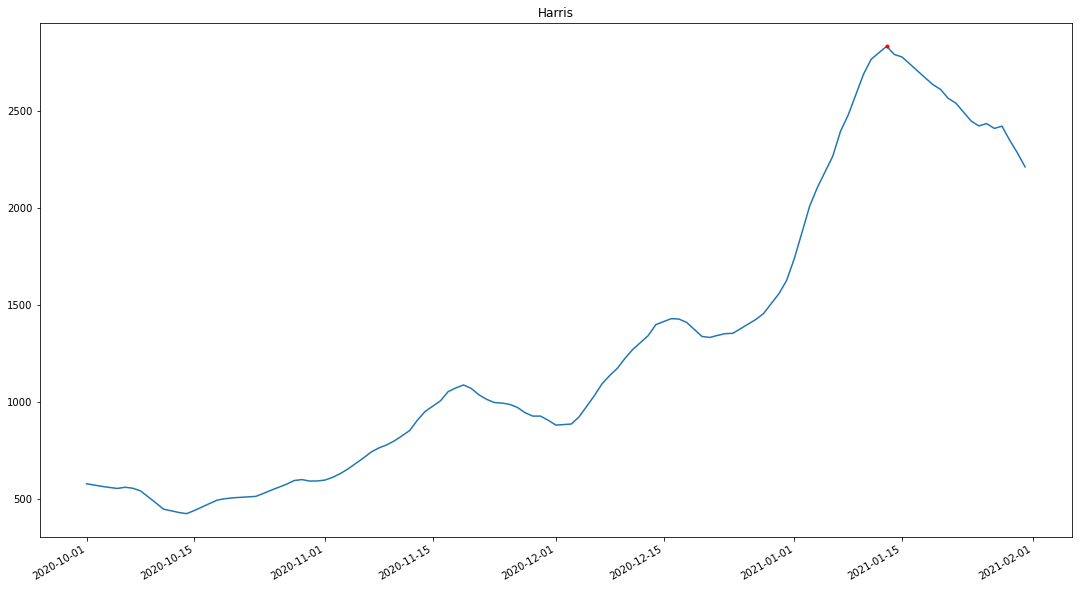

In [89]:
'''
good_states = ['Harris, Texas', 'Wisconsin', 'North Dakota', 'South Dakota', 'Tennessee', 'Ohio']
ok_states = ['Florida', 'Illinois', 'Colorado', 'Oregon', 'North Carolina', 'Montana', 'Pennsylvania']
states = good_states + ok_states
states = [state + ', US' for state in states]

countries = ['Turkey', 'Israel', 'France', 'Ukraine']
countries = [country + ', ' + country for country in countries]

places = states + countries
latdata = coords[['Place','Lat']][coords['Place'].isin(places)]
'''

good_counties = ['Andrews', 'Bailey', 'Baylor', 'Harris', 'Travis', 'Crockett', 'Edwards', 'Frio', 'Nueces', 'Fayette']
ray_counties = ['Potter', 'Dallas', 'Hidalgo', 'Cameron']

places = good_counties + ray_counties
places = ['Harris', 'Harris']
latdata = coords[['Place','Lat', 'Long', 'Vaccination rate']][coords['Place'].isin(places)]
# latdata = coords[['Place','Lat', 'Long', 'Vaccination rate']][coords['Population'] > 150000]
# latdata = latdata[latdata['Place'] != 'Sherman']
    
dates = list(pd.to_datetime(data['Date']))

placeout = []
lats = []
longs = []
vacs = []
peaks = []
window = [253,376] #10/1/20 - 2/1/21 for TexasData.csv
# window = [618, 677] #10/1/21 - 11/29/21 for TexasData.csv
# window = [162,285] #10/1/20 - 2/1/21 for TexasDataCut.csv
for i, row in latdata.iterrows():
    place = row['Place']; lat = row['Lat']; vr = row['Vaccination rate']; long = row['Long']
    locc = np.clip(data[place].rolling(window=5, center=True).median(),0,None) #filter cases
#     locc = data[place]
#     loct = tests[place].rolling(window=3, center=True).median() #filter tests
#     locd = np.clip(np.divide(locc, loct, out=np.zeros_like(locc), where=loct!=0).rolling(window=14, center=True).mean(),0,1)  #calculate cpt using np "safe division"
    locd = locc.rolling(window=14, center=True).mean()
    winter = locd[window[0]:window[1]]
    avg = np.mean(winter)
#     peak = [np.argmax(winter)] #2021
    peak, _ = signal.find_peaks(winter, height=1.5*avg, distance=200) #only want one peak
    trough, _ = signal.find_peaks(-winter, distance=200)
#     half_width = signal.peak_widths(locd, peaks, rel_height=1)[0]  # peak width at half maximum
    if peak.size > 0:
        placeout.append(place)
        lats.append(lat)
        vacs.append(vr)
        longs.append(long)
        peaks.append(peak[0] + window[0])
#         print(dates[peak[0] + window[0]])
        #if you want to plot each individual location
        fig, ax = plt.subplots()
        plt.plot(dates[window[0]:window[1]], winter)
        plt.plot(dates[peaks[-1]], winter[peaks[-1]], 'r.')
        fig.autofmt_xdate()
        fig.set_size_inches(18.5, 10.5, forward=True)
        plt.title(str(place))
#         plt.savefig('graphs/AvgLat' + str(lat) + '.png' , dpi=100)
'''
#fit line to data
out = [(-1)*vr + (0)*(lat/1) for lat, vr in zip(lats, vacs)]
# out = longs
coef, residual, _, _, _ = np.polyfit(peaks, out, 1, full=True); line = [peak*coef[0] + coef[1] for peak in peaks]
err = residual[0]
#convert peak indeces to dates
peaks = [dates[i] for i in peaks]
#plot output
fig, ax = plt.subplots()
ax.scatter(peaks, out)

#label scatterpoints
for i, txt in enumerate(placeout):
    ax.annotate(txt, (peaks[i], out[i]), horizontalalignment='left', verticalalignment='top')
ax.plot(peaks, line, ':')
ax.set_xlabel('Date of peak')
ax.set_ylabel('Longitude')
ax.set_title('Texas Covid Peaks Winter 2020 - Population > 150k')
#format x-axis to datetime
fig.autofmt_xdate()

# Text in the x axis will be displayed in 'YYYY-mm' format.
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

#set figure size
fig.set_size_inches(18.5, 10.5, forward=True)

#save plot
# plt.savefig('graphs/LongPop150.png' , dpi=100)
'''

2020-11-01 00:00:00


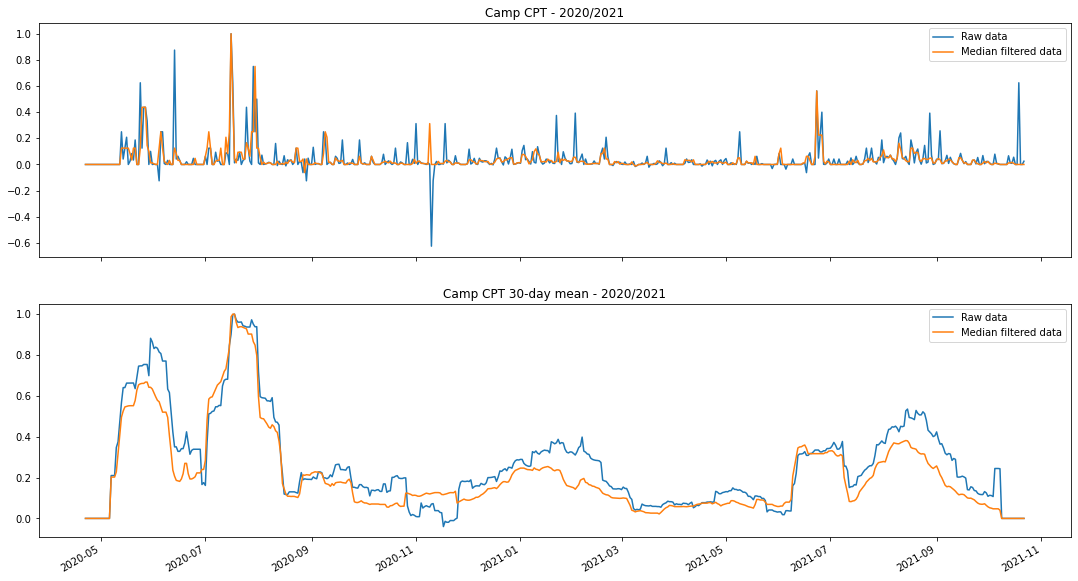

In [120]:
dates = list(pd.to_datetime(data['Date'][:-3]))
county = data['Camp'][3:].reindex(range(549))
ctests = tests['Camp'][:-3]
# county = data.iloc[:,1]
county_med = county.rolling(window=3, center=True).median()
county_mean = county.rolling(window=30, center=True).mean()
county_medmean = county_med.rolling(window=30, center=True).mean()

cpt = np.divide(county, ctests, out=np.zeros_like(county), where=ctests!=0, casting='unsafe').fillna(0)
cpt_mean = cpt.rolling(window=30, center=True).mean().fillna(0)

ctests_med = ctests.rolling(window=3, center=True).median()
cpt_med = np.divide(county_med, ctests_med, out=np.zeros_like(county_med), where=ctests_med!=0).fillna(0)
cpt_medmean = cpt_med.rolling(window=30, center=True).mean().fillna(0)

cpt = cpt / max(cpt)
cpt_mean = cpt_mean / max(cpt_mean)
cpt_med = cpt_med / max(cpt_med)
cpt_medmean = cpt_medmean / max(cpt_medmean)

# window = [253,376] #10/1/20 - 2/1/21
# dates = dates[window[0]:window[1]]
# county = county[window[0]:window[1]]
print(dates[np.argmax(county)])

fig, axs = plt.subplots(2)
axs[0].plot(dates, cpt, '-')
axs[0].plot(dates, cpt_med, '-')
axs[0].set_title('Camp CPT - 2020/2021')
axs[0].legend(['Raw data', 'Median filtered data'])
axs[1].plot(dates, cpt_mean, '-')
axs[1].plot(dates, cpt_medmean, '-')
axs[1].set_title('Camp CPT 30-day mean - 2020/2021')
axs[1].legend(['Raw data', 'Median filtered data'])
#format x-axis to datetime
fig.autofmt_xdate()

#set figure size
fig.set_size_inches(18.5, 10.5, forward=True)

#save plot
# plt.savefig('graphs/Dallas_CPT.png' , dpi=100)

In [117]:
#for grouping locations by latitude and population
data = pd.read_csv('data/Texas/TexasDataCut.csv')
tests = pd.read_csv('data/Texas/TexasTestsCut.csv')
coords = pd.read_csv('data/Texas/TexasCords.csv', thousands=',').sort_values(by='Lat')
coords['Population'] = pd.to_numeric(coords['Population'])
groups = {}
groupsdata = {}
group = ""
# groupdata = np.zeros(643)
groupdata = np.zeros(552)
grouptests = np.zeros(552)
curpop = 0
firstlat = 26.14524221 #latitude of southern-most county in TX
latavg = 0
groupnum = 0
for i, row in coords.iterrows():
    lat = row['Lat']
    place = row['Place']
    if lat > firstlat+1:
        groups[group] = (latavg / groupnum, curpop)
#         groupsdata[group] = groupdata
        groupsdata[group] = np.divide(groupdata, grouptests, out=np.zeros_like(groupdata), where=grouptests!=0) #calculate cpt using np "safe division"
        group = place
        curpop = row['Population']
        firstlat += 1
        latavg = lat
        groupdata = data[place].rolling(window=3, center=True).median()
        grouptests = tests[place].rolling(window=3, center=True).median() #filter tests
        groupnum = 1
#     elif (curpop > 150000):
#         groups[group] = (latavg / groupnum, curpop)
#         groupsdata[group] = groupdata
#         group = place
#         curpop = row['Population']
#         firstlat = lat
#         latavg = lat
#         groupdat = data[place]
#         groupnum = 1
    else:
        curpop += row['Population']
        latavg += lat
        groupnum += 1
        groupdata = groupdata + data[place].rolling(window=3, center=True).median()
        grouptests = grouptests + tests[place].rolling(window=3, center=True).median()
        group = group + ', ' + place
        
# for i in range(10):
#     lat = firstlat + i
#     group = data[coords['Lat'] > lat & coords['Lat'] < lat+1]
#     print(group)
# pd.DataFrame(data=groups).to_csv('TexasCountyGroupings0.5.csv')
# pd.DataFrame(data=groupsdata).to_csv('data/Texas/CountyGroups/TexasCPTData1.csv')
    